## Predicting which particular customer most likely to buy from a online retailer

In [77]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import seaborn as sn

In [78]:
# Loading the data
df = pd.read_excel("./datasets/marketing_statistics.xlsx")
df


,Purchasing behaviour,Gender,Age,Time spent in online shop
0,Buy now,female,22,40
1,Buy now,female,25,23
2,Buy now,male,18,12
3,Buy now,male,45,28
4,Buy now,female,12,43
5,Buy now,male,43,23
6,Buy now,male,23,55
7,Buy now,male,33,34
8,Buy later,female,27,28
9,Buy later,female,27,15


In [79]:
# Changing categorical data into numerical data

le_purchase = LabelEncoder()
df['Purchasing behaviour'] = le_purchase.fit_transform(df['Purchasing behaviour'])

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

df

,Purchasing behaviour,Gender,Age,Time spent in online shop
0,1,0,22,40
1,1,0,25,23
2,1,1,18,12
3,1,1,45,28
4,1,0,12,43
5,1,1,43,23
6,1,1,23,55
7,1,1,33,34
8,0,0,27,28
9,0,0,27,15


In [80]:
# Train test split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(19, 3)

(19,)

(5, 3)

(5,)

In [81]:
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [82]:
y_pred = model.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix)
acc_score = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy percentage: ", acc_score, "%")


Confusion Matrix: [[0 0 1]
 [0 1 0]
 [1 0 2]]
Accuracy percentage:  60.0 %


<Axes: xlabel='Predicted', ylabel='Actual'>

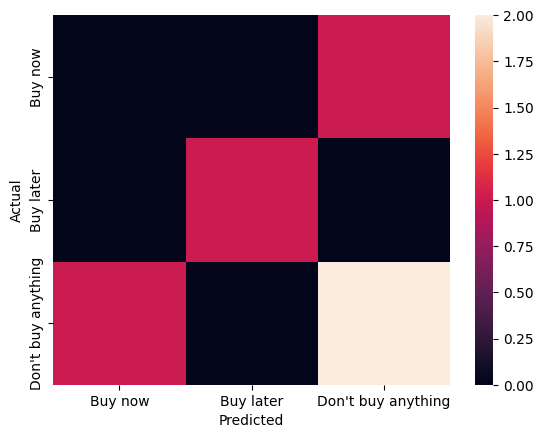

In [90]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, yticklabels=["Buy now", "Buy later", "Don't buy anything"], xticklabels=["Buy now", "Buy later", "Don't buy anything"])